# McDonalds Menu Nutrition Data Analysis & ML

# Importing the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mcdonalds = pd.read_csv('/kaggle/input/mcdonalds-nutrition/McDonaldsMenuNutrition.csv')

In [3]:
mcdonalds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item                  330 non-null    object 
 1   Calories              328 non-null    float64
 2   Calories from
Fat     325 non-null    float64
 3   Total Fat
(g)         328 non-null    float64
 4   Saturated Fat
(g)     328 non-null    object 
 5   Trans Fat
(g)         328 non-null    float64
 6   Cholesterol
(mg)      328 non-null    float64
 7   Sodium 
(mg)          328 non-null    float64
 8   Carbs
(g)             328 non-null    float64
 9   Fiber
(g)             328 non-null    float64
 10  Sugars
(g)            328 non-null    float64
 11  Protein
(g)           328 non-null    float64
 12  Weight Watchers
Pnts  325 non-null    float64
dtypes: float64(11), object(2)
memory usage: 33.6+ KB


# To conduct proper data analysis, we must understand the data.

<img src="https://i.hizliresim.com/s6qlijw.png" alt="Image">


In [4]:
feature_explanations = {
    'Calories': "Calories are units used to measure the energy content of food. They represent the energy our bodies get from what we eat. Different nutrients like carbs, proteins, and fats provide varying amounts of energy. Monitoring calorie intake is crucial for managing weight. Consuming more calories than we burn can lead to weight gain, while consuming fewer can lead to weight loss.",
    'Calories from Fat': "Calories from Fat represent the energy content that comes from the fat in the food. Fat is a concentrated source of energy. Foods with high calories from fat might contribute to weight gain if consumed excessively.",
    'Total Fat': "Total Fat refers to the total amount of fats in the food. Fats are essential for various bodily functions, but excessive consumption can lead to health problems. Choosing healthy fats in moderation is important.",
    'Saturated Fat': "Saturated Fat is a type of fat that is associated with raising LDL cholesterol levels, which can increase the risk of heart disease. It's recommended to limit saturated fat intake.",
    'Trans Fat': "Trans Fat is a type of unsaturated fat that is associated with health risks, including heart disease. Many health organizations recommend avoiding trans fats.",
    'Cholesterol': "Cholesterol is a waxy substance found in foods of animal origin. While our bodies need cholesterol for various functions, high levels of dietary cholesterol can contribute to heart disease in some individuals.",
    'Sodium': "Sodium is an essential mineral, but high sodium intake can lead to high blood pressure and other health issues. Monitoring sodium intake is important, especially for those with hypertension.",
    'Carbs': "Carbs (carbohydrates) are a primary source of energy for our bodies. They include sugars, starches, and fiber. Choosing complex carbs and fiber-rich foods can support overall health.",
    'Fiber': "Fiber is a type of carbohydrate that is not fully digested by our bodies. It's important for digestive health, can help control blood sugar levels, and may aid in weight management.",
    'Sugars': "Sugars are simple carbohydrates that provide quick energy but can contribute to blood sugar spikes. Limiting added sugars is recommended for overall health.",
    'Protein': "Protein is essential for building and repairing tissues in our bodies. It also plays a role in various bodily functions. Including adequate protein in your diet is important for overall health.",
    'Weight Watchers Pnts': "Weight Watchers Points is a system used to assign values to foods based on their nutritional content. It helps people make healthier food choices and manage their calorie intake for weight loss or maintenance."
}

# Create a DataFrame from the dictionary
feature_mcdonalds = pd.DataFrame.from_dict(feature_explanations, orient='index', columns=['Explanation'])

# Display the DataFrame
pd.set_option('display.max_colwidth', None)  # Display full column width
feature_mcdonalds

,Explanation
Calories,"Calories are units used to measure the energy content of food. They represent the energy our bodies get from what we eat. Different nutrients like carbs, proteins, and fats provide varying amounts of energy. Monitoring calorie intake is crucial for managing weight. Consuming more calories than we burn can lead to weight gain, while consuming fewer can lead to weight loss."
Calories from Fat,Calories from Fat represent the energy content that comes from the fat in the food. Fat is a concentrated source of energy. Foods with high calories from fat might contribute to weight gain if consumed excessively.
Total Fat,"Total Fat refers to the total amount of fats in the food. Fats are essential for various bodily functions, but excessive consumption can lead to health problems. Choosing healthy fats in moderation is important."
Saturated Fat,"Saturated Fat is a type of fat that is associated with raising LDL cholesterol levels, which can increase the risk of heart disease. It's recommended to limit saturated fat intake."
Trans Fat,"Trans Fat is a type of unsaturated fat that is associated with health risks, including heart disease. Many health organizations recommend avoiding trans fats."
Cholesterol,"Cholesterol is a waxy substance found in foods of animal origin. While our bodies need cholesterol for various functions, high levels of dietary cholesterol can contribute to heart disease in some individuals."
Sodium,"Sodium is an essential mineral, but high sodium intake can lead to high blood pressure and other health issues. Monitoring sodium intake is important, especially for those with hypertension."
Carbs,"Carbs (carbohydrates) are a primary source of energy for our bodies. They include sugars, starches, and fiber. Choosing complex carbs and fiber-rich foods can support overall health."
Fiber,"Fiber is a type of carbohydrate that is not fully digested by our bodies. It's important for digestive health, can help control blood sugar levels, and may aid in weight management."
Sugars,Sugars are simple carbohydrates that provide quick energy but can contribute to blood sugar spikes. Limiting added sugars is recommended for overall health.


# We're performing couple of feature engineering here for the purpose of adjust the column names.

In [5]:
for i in mcdonalds.columns:
    if '\n' in i:
        new_name = i.replace('\n',' ')
        mcdonalds.rename(columns={i: new_name}, inplace=True)
mcdonalds.columns
for col in mcdonalds.columns[2:]:
    mcdonalds[col] = pd.to_numeric(mcdonalds[col],errors='coerce')

<img src="https://i.hizliresim.com/74o6d5w.png" alt="Image">


<Axes: >

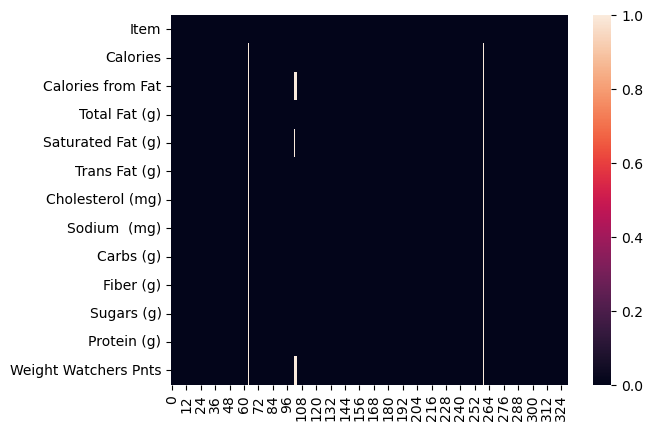

In [6]:
sns.heatmap(mcdonalds.isnull().T)

# We got no many NaN values , so we can ignore them.

Text(-200.65277777777777, 0.5, '')

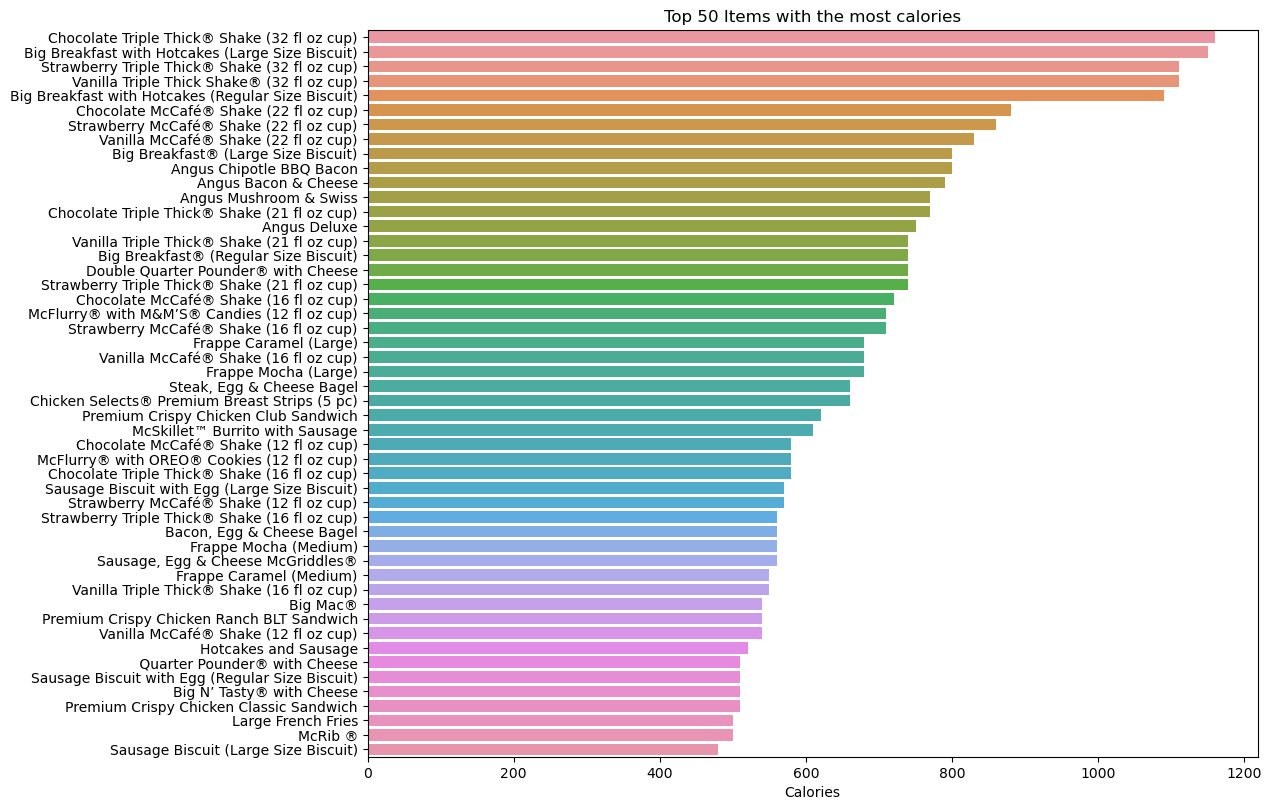

In [7]:
plt.figure(figsize=(13,8))
sns.barplot(x='Calories',y='Item',data=mcdonalds.sort_values(by='Calories',ascending=False).iloc[:50])
plt.tight_layout()
plt.title('Top 50 Items with the most calories')
plt.ylabel('')

Text(-204.90277777777777, 0.5, '')

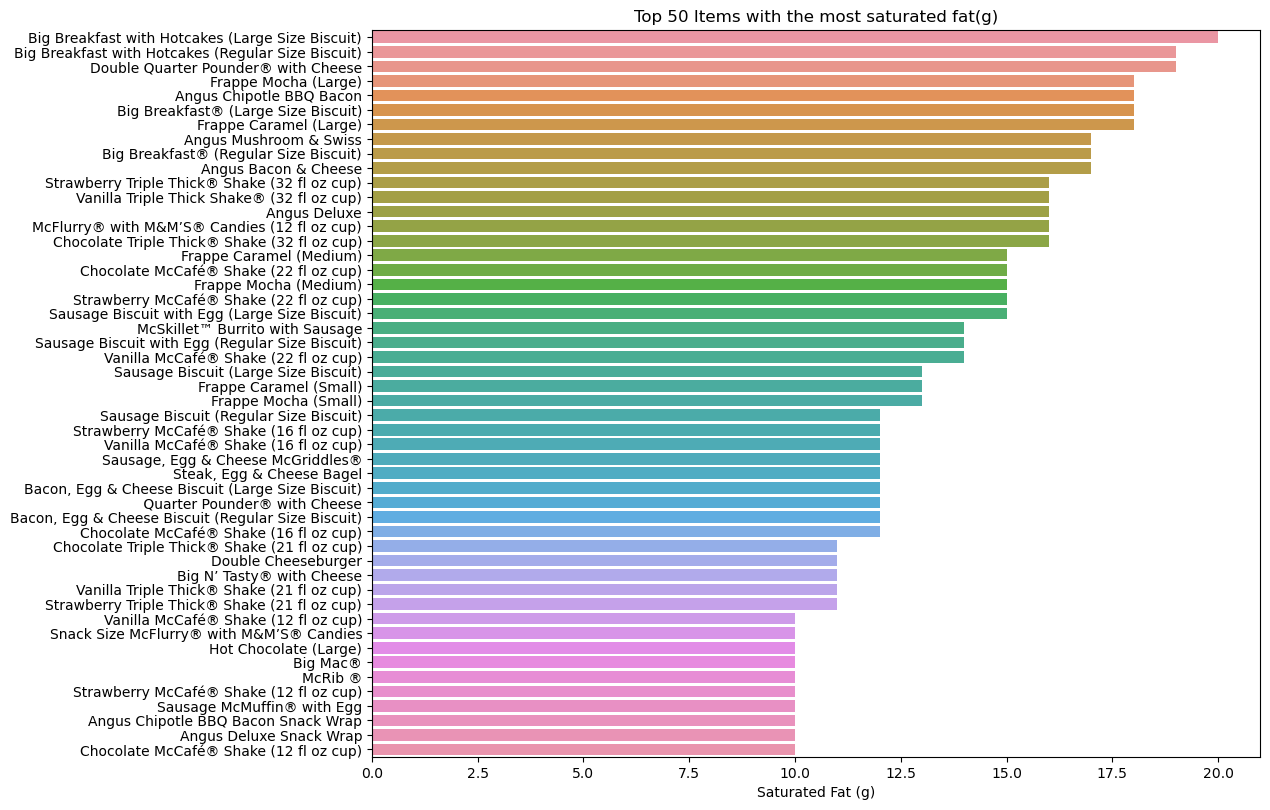

In [8]:
plt.figure(figsize=(13,8))
sns.barplot(x='Saturated Fat (g)',y='Item',data=mcdonalds.sort_values(by='Saturated Fat (g)',ascending=False).iloc[:50])
plt.tight_layout()
plt.title('Top 50 Items with the most saturated fat(g)')
plt.ylabel('')

Text(-200.65277777777777, 0.5, '')

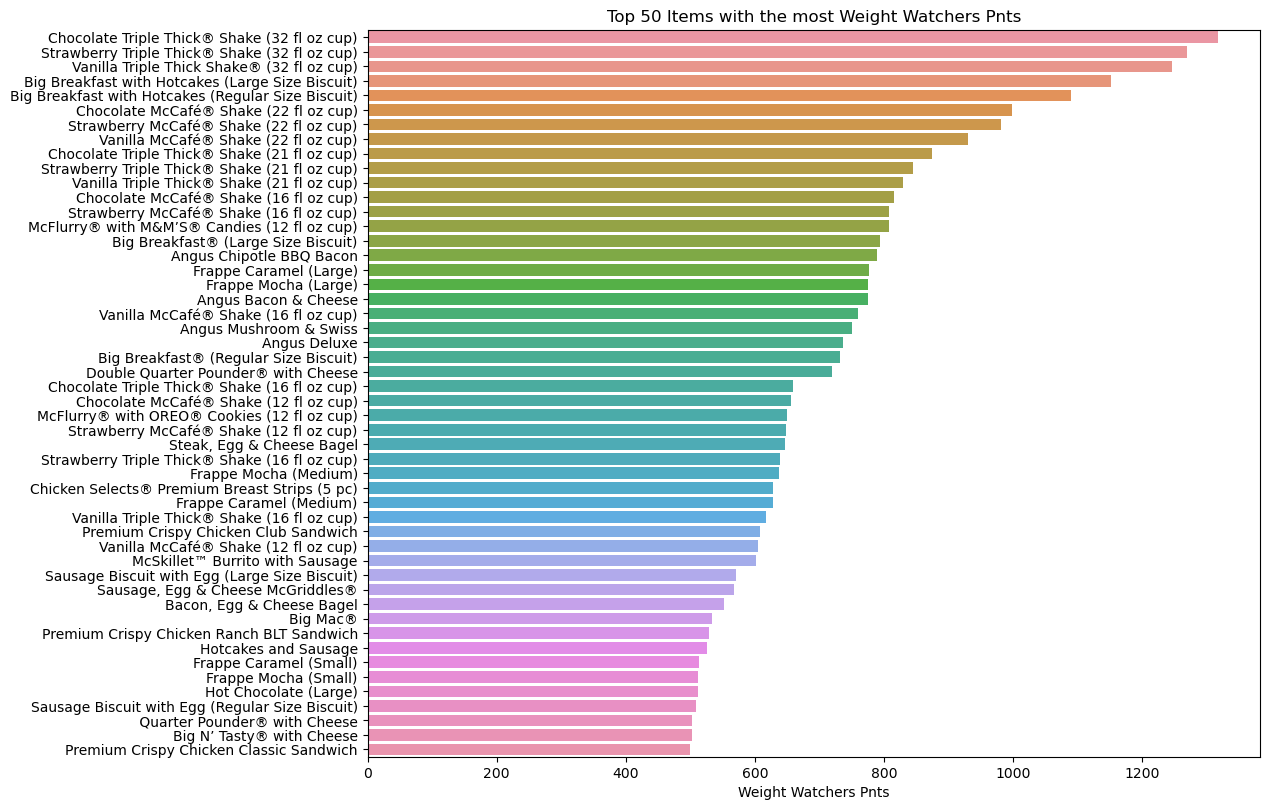

In [9]:
plt.figure(figsize=(13,8))
sns.barplot(x='Weight Watchers Pnts',y='Item',data=mcdonalds.sort_values(by='Weight Watchers Pnts',ascending=False).iloc[:50])
plt.tight_layout()
plt.title('Top 50 Items with the most Weight Watchers Pnts')
plt.ylabel('')

# As we've provided the information above, when the Weight Watchers points are lower, the food's healthiness increases. Let's now visualize the top 10 healthiest items.

<img src="https://i.hizliresim.com/l6m1lh5.png" alt="Image">


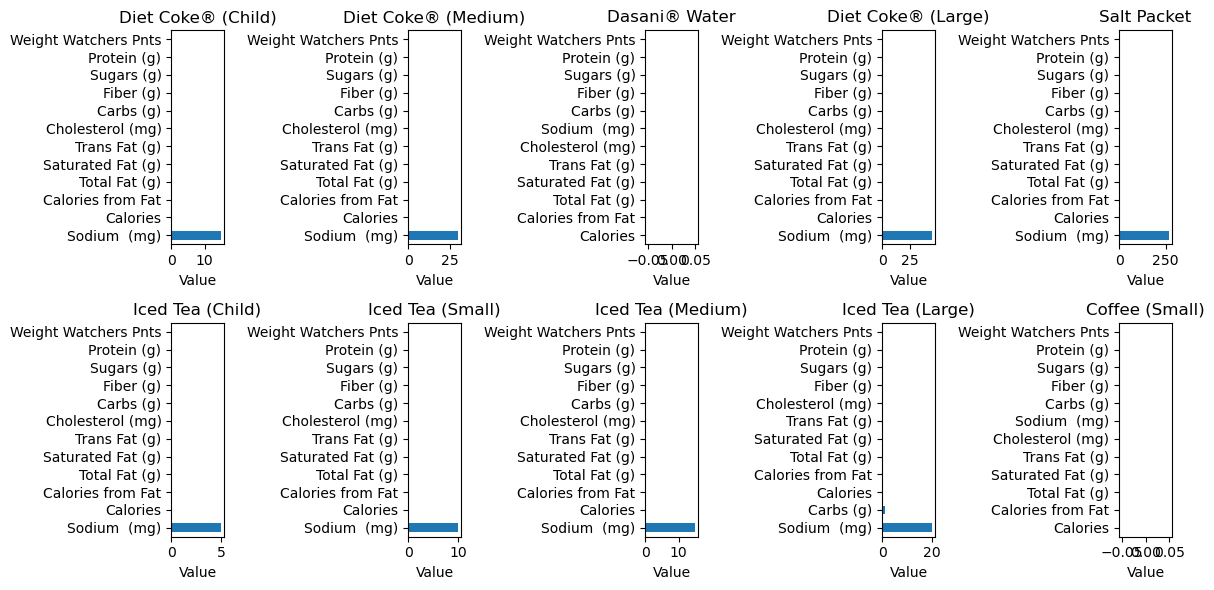

In [10]:
top_10_low_wwp = mcdonalds.sort_values(by='Weight Watchers Pnts', ascending=True).iloc[:10]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5)

for ax, item_row in zip(axes.flatten(), top_10_low_wwp.iterrows()):
    _, item_data = item_row

    # Sort features based on their values for the current item
    sorted_features = item_data.iloc[1:].sort_values(ascending=False)

    # Create horizontal bar plot for sorted features
    sorted_features.plot(kind='barh', ax=ax)
    ax.set_title(item_data['Item'])
    ax.set_xlabel('Value')

plt.tight_layout()
plt.show()


<img src="https://i.hizliresim.com/gwahyxk.png" alt="Image">


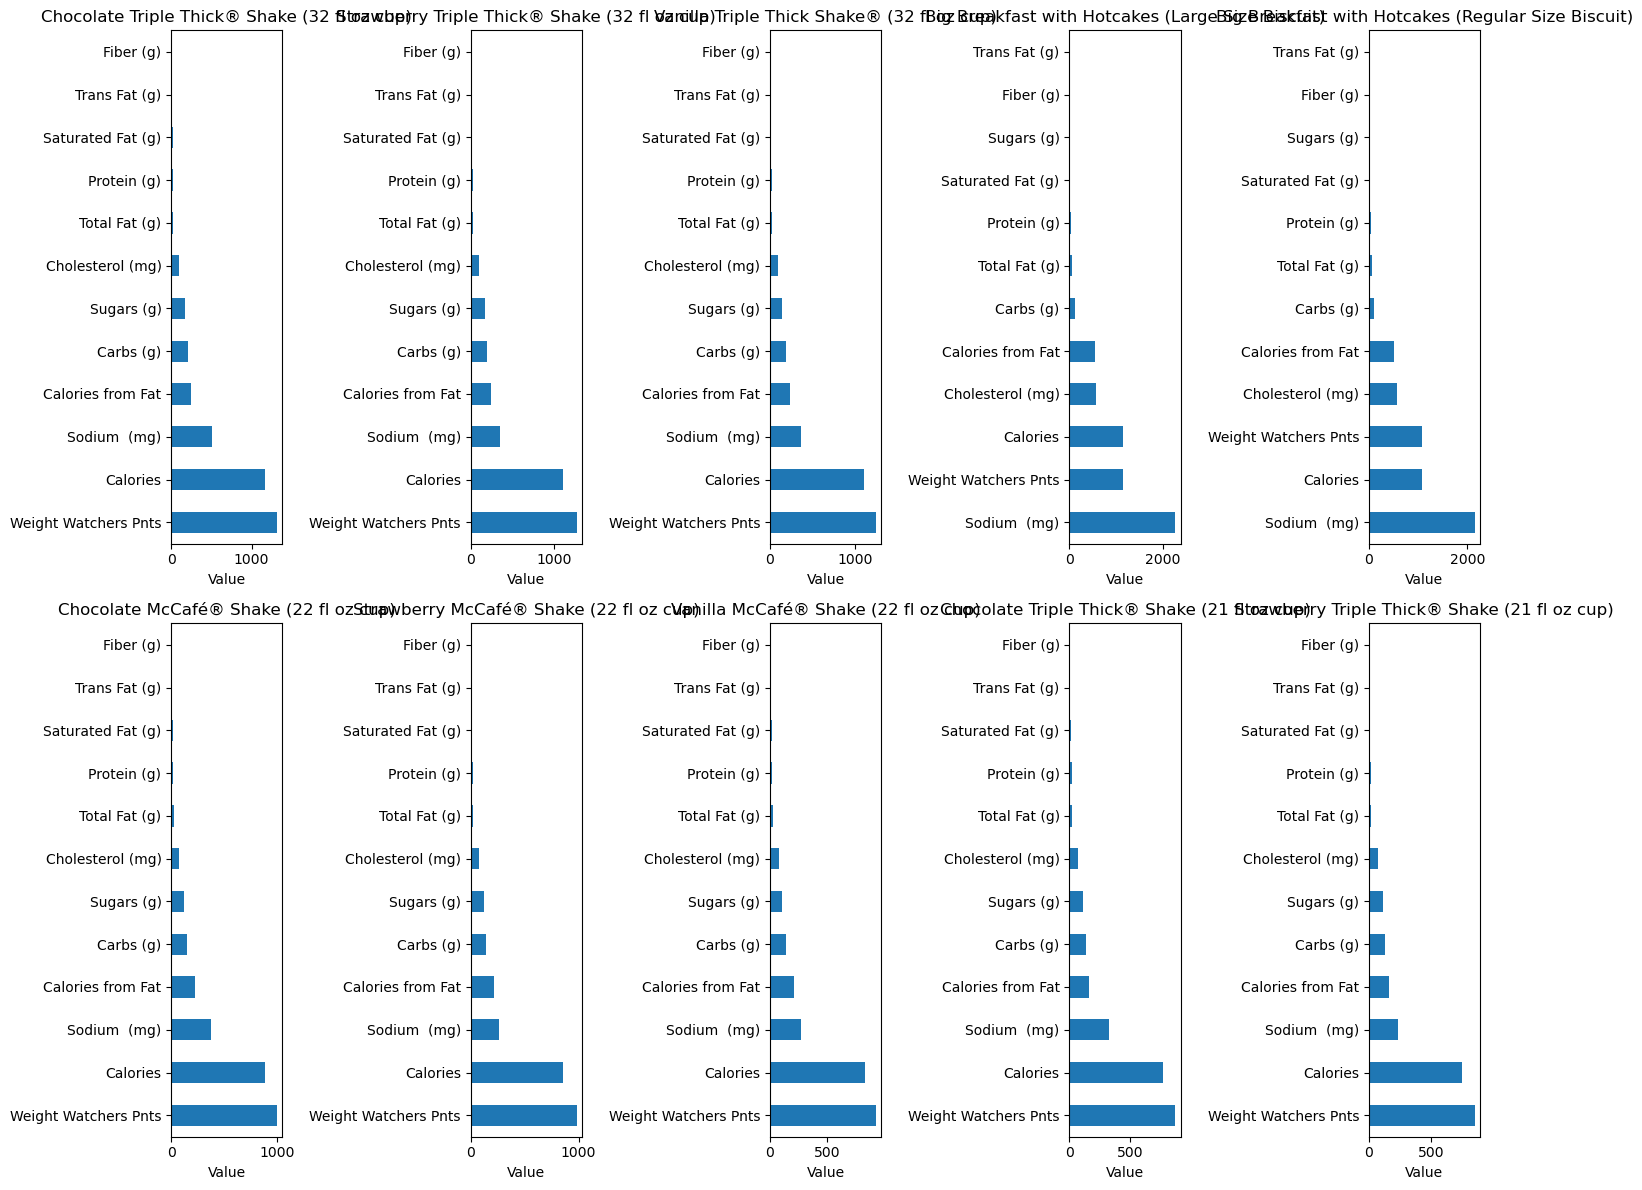

In [11]:
top_10_high_wwp = mcdonalds.sort_values(by='Weight Watchers Pnts', ascending=False).iloc[:10]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)

for ax, item_row in zip(axes.flatten(), top_10_high_wwp.iterrows()):
    _, item_data = item_row

    # Sort features based on their values for the current item
    sorted_features = item_data.iloc[1:].sort_values(ascending=False)

    # Create horizontal bar plot for sorted features
    sorted_features.plot(kind='barh', ax=ax)
    ax.set_title(item_data['Item'])
    ax.set_xlabel('Value')

plt.tight_layout()
plt.show()


  # Here's the top 10 unhealthy items.

# We have identified a business opportunity through our data analysis. By utilizing machine learning applications and configuring the data, we can make predictions based on Weight Watchers Points.

In [12]:
mcdonalds.dropna(inplace=True)
X = mcdonalds.drop(columns=['Item','Weight Watchers Pnts'])
y = mcdonalds['Weight Watchers Pnts']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [13]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
from sklearn import metrics
print('MAE : ',metrics.mean_absolute_error(y_test,predictions))
print('MSE : ',metrics.mean_squared_error(y_test,predictions))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE :  1.926209200999661e-13
MSE :  6.968608555535393e-26
RMSE :  2.639812219748858e-13


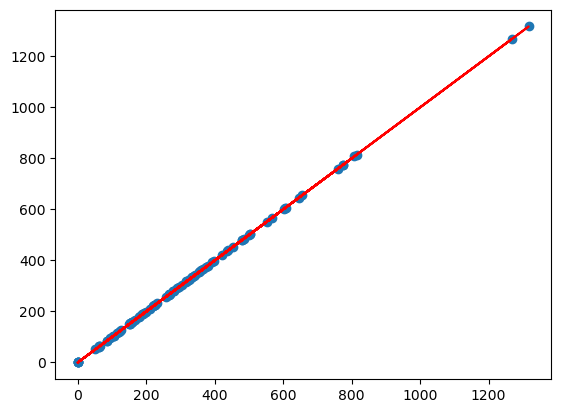

In [14]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

# Our model predicted the target value perfectly. We could create a function to classify WWP, but WWP values are not ranged based on international standards.

# Thank you for your interest in my project.